# Filter Size Impact on CNN Feature Extraction

This notebook demonstrates how varying convolutional filter sizes (3x3, 5x5, 7x7) impact feature extraction in CNNs using the MNIST dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

## Load and Preprocess MNIST Data

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the data
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Define CNN Model

In [5]:
# Function to build CNN model with given filter size
def build_cnn(filter_size):
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(32, (filter_size, filter_size), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

## Train and Evaluate Models with Different Filter Sizes

In [9]:
filter_sizes = [3, 5, 7]
histories = {}
results = {}

for size in filter_sizes:
    model = build_cnn(size)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    histories[size] = history
    results[size] = (test_acc, test_loss)

print("Model Performance:")
for size in filter_sizes:
    acc, loss = results[size]
    print(f"{size}x{size} Filter - Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

Model Performance:
3x3 Filter - Test Accuracy: 0.9853, Test Loss: 0.0466
5x5 Filter - Test Accuracy: 0.9893, Test Loss: 0.0346
7x7 Filter - Test Accuracy: 0.9892, Test Loss: 0.0351


## Visualize Filter Effects on a Sample Image

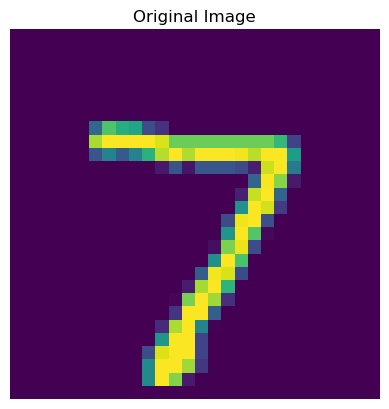

In [11]:
# Take a sample test image
sample_image = x_test[0:1]

# Display original image
plt.imshow(sample_image[0, :, :, 0], cmap='viridis')
plt.title("Original Image")
plt.axis('off')
plt.show()

## Apply Filters and Edge Detection

In [13]:
# Function to apply a filter and return the output
def apply_filter(image, filter_size):
    input_layer = Input(shape=image.shape[1:])
    conv_layer = Conv2D(1, filter_size, activation='relu', padding='same')(input_layer)
    model = Model(inputs=input_layer, outputs=conv_layer)
    return model.predict(image)

# Function to apply custom kernel (e.g., edge detection)
def apply_custom_filter(image, custom_kernel):
    input_layer = Input(shape=image.shape[1:])
    conv_layer = Conv2D(1, custom_kernel.shape, activation='relu', padding='same')(input_layer)
    model = Model(inputs=input_layer, outputs=conv_layer)
    kernel = np.expand_dims(np.expand_dims(custom_kernel, axis=-1), axis=-1)
    model.layers[1].set_weights([kernel, np.zeros(1)])
    return model.predict(image)

In [15]:
# Apply 3x3, 5x5, 7x7 filters
filtered_3x3 = apply_filter(sample_image, (3, 3))
filtered_5x5 = apply_filter(sample_image, (5, 5))
filtered_7x7 = apply_filter(sample_image, (7, 7))

# Define and apply custom edge detection filter
edge_filter = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])
custom_filtered = apply_custom_filter(sample_image, edge_filter)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


## Plot Original and Filtered Images

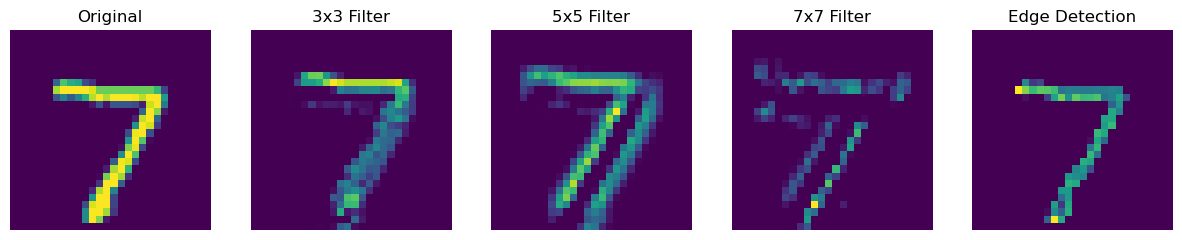

In [17]:
titles = ['Original', '3x3 Filter', '5x5 Filter', '7x7 Filter', 'Edge Detection']
images = [sample_image[0, :, :, 0], filtered_3x3[0, :, :, 0], filtered_5x5[0, :, :, 0],
          filtered_7x7[0, :, :, 0], custom_filtered[0, :, :, 0]]

plt.figure(figsize=(15, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='viridis')
    plt.title(titles[i])
    plt.axis('off')
plt.show()